- Look for the Measure of Central Tendency from the data.
- Look for the Measure of Variance from the data.

In [1]:
# Import library used
import pandas as pd

In [2]:
# Import dataset
covid = pd.read_csv("covid_19_indonesia_time_series_all.csv")

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [49]:
covid

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
198,3/23/2020,ID-SS,Sumatera Selatan,1,2,0,-1,1,2,1,...,-3.216212,0.12,0.12,0.24,0.24,0.02,200.00%,100.00%,NaN,NaN
217,3/24/2020,ID-SS,Sumatera Selatan,0,0,0,0,1,2,1,...,-3.216212,0.00,0.12,0.00,0.24,0.02,200.00%,100.00%,0.00,0.0
236,3/25/2020,ID-SS,Sumatera Selatan,0,0,0,0,1,2,1,...,-3.216212,0.00,0.12,0.00,0.24,0.02,200.00%,100.00%,1.00,1.0
261,3/26/2020,ID-SS,Sumatera Selatan,0,0,0,0,1,2,1,...,-3.216212,0.00,0.12,0.00,0.24,0.02,200.00%,100.00%,1.00,1.0
287,3/27/2020,ID-SS,Sumatera Selatan,0,0,0,0,1,2,1,...,-3.216212,0.00,0.12,0.00,0.24,0.02,200.00%,100.00%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31681,9/11/2022,ID-SS,Sumatera Selatan,17,1,26,-10,82173,3374,78476,...,-3.216212,2.07,9999.69,0.12,410.58,41.06,4.11%,95.50%,0.74,NaN
31716,9/12/2022,ID-SS,Sumatera Selatan,2,1,29,-28,82175,3375,78505,...,-3.216212,0.24,9999.94,0.12,410.71,41.07,4.11%,95.53%,0.12,1.0
31751,9/13/2022,ID-SS,Sumatera Selatan,2,1,3,-2,82177,3376,78508,...,-3.216212,0.24,10000.18,0.12,410.83,41.08,4.11%,95.54%,1.00,1.0
31786,9/14/2022,ID-SS,Sumatera Selatan,5,0,1,4,82182,3376,78509,...,-3.216212,0.61,10000.79,0.00,410.83,41.08,4.11%,95.53%,2.50,0.0


### Central Tendency

In [4]:
# Group data for the South Sumatra region
covid = covid[covid['Location'] == "Sumatera Selatan"]

In [5]:
#Get Mean
print("Mean: ", covid['Total Cases'].mean())

#Get Median
print("Median: ", covid['Total Cases'].median())

#Get Mode
print("Median: ", covid['Total Cases'].mode())

Mean:  38018.84895259096
Median:  26976.0
Median:  0    1
Name: Total Cases, dtype: int64


In [6]:
covid["Location"]

198      Sumatera Selatan
217      Sumatera Selatan
236      Sumatera Selatan
261      Sumatera Selatan
287      Sumatera Selatan
               ...       
31681    Sumatera Selatan
31716    Sumatera Selatan
31751    Sumatera Selatan
31786    Sumatera Selatan
31819    Sumatera Selatan
Name: Location, Length: 907, dtype: object

### Variance

In [7]:
#Range
case = ['New Active Cases','Total Cases','Total Deaths','Total Recovered']
for col in case:
    print(covid[col].name + ' range: ' + str(covid[col].max() - covid[col].min()))

New Active Cases range: 1955
Total Cases range: 82197
Total Deaths range: 3374
Total Recovered range: 78509


In [8]:
#Percentiles
from scipy import stats

print("Percentiles :", stats.percentileofscore(covid['Total Recovered'],3376))

Percentiles : 18.412348401323044


In [9]:
#Quartiles

print("Quartil :",covid['Total Cases'].quantile([0.25,0.5,0.75]))

Quartil : 0.25     8056.0
0.50    26976.0
0.75    60190.5
Name: Total Cases, dtype: float64


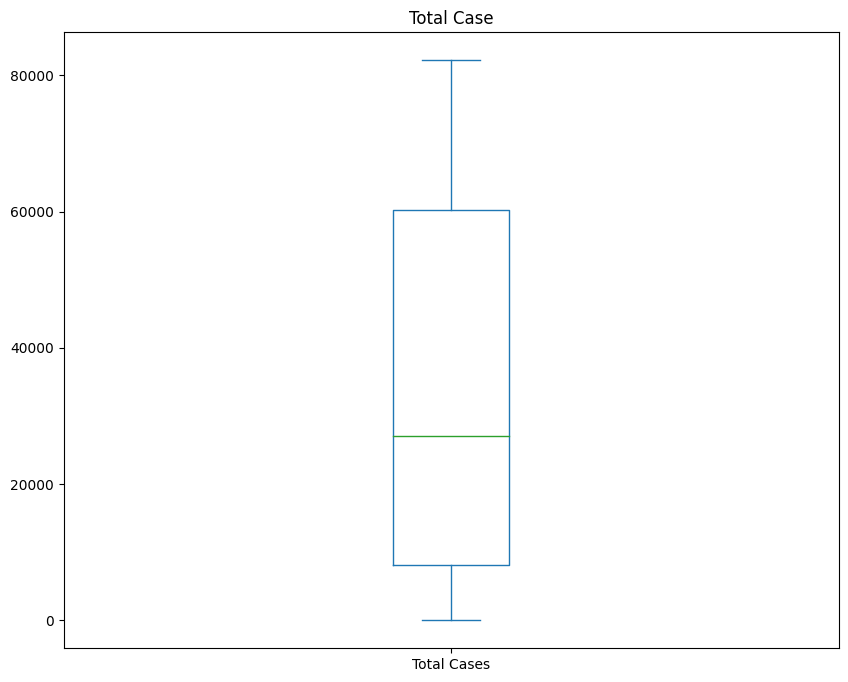

In [10]:
# Visualize case
%matplotlib inline
from matplotlib import pyplot as plt

covid['Total Cases'].plot(kind='box', title='Total Case', figsize=(10,8))
plt.show()

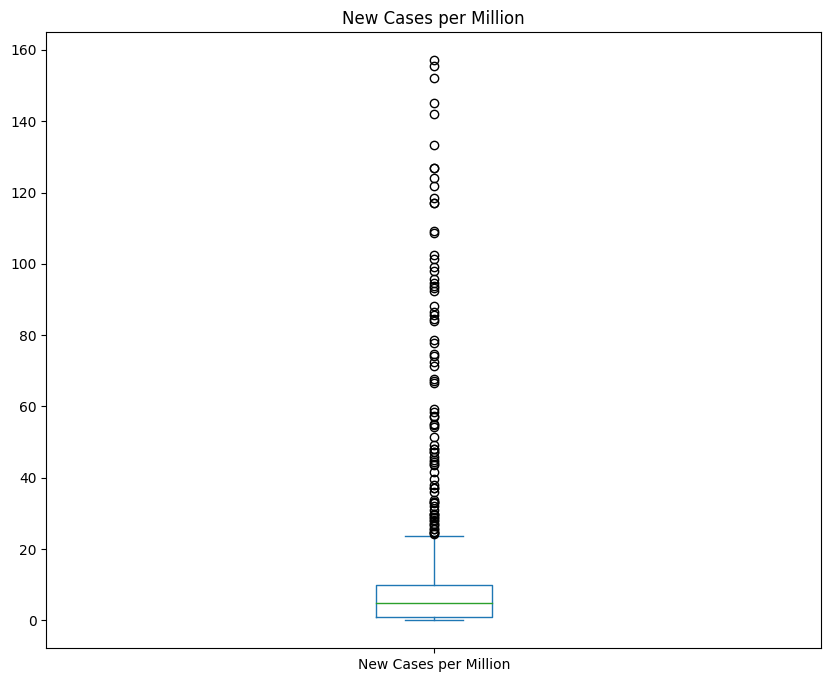

In [11]:
covid['New Cases per Million'].plot(kind='box', title='New Cases per Million', figsize=(10,8))
plt.show()

In [12]:
# Get the Variance
print(covid['Total Cases'].var())

952205475.7310225


In [13]:
# Get the Standard Deviation
print(covid['Total Cases'].std())

30857.826814781085
